#Python3

In [1]:
import os
from functional import seq
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from typing import List
from functools import reduce,partial
filename = "problems/CBS_k3_n100_m403_b10_0.cnf"


In [2]:
! tree logs

logs
├── 20k_1
│   ├── b10_0_emas_flip_0-01.txt
│   ├── b10_0_emas_flip_0-1.txt
│   ├── b10_0_emas_flip_0-3.txt
│   ├── b10_0_emas_flip_0-6.txt
│   ├── b10_0_emas_swap_0-01.txt
│   ├── b10_0_emas_swap_0-1.txt
│   ├── b10_0_emas_swap_0-3.txt
│   ├── b10_0_emas_swap_0-6.txt
│   ├── b10_0_evol_flip_0-01.txt
│   ├── b10_0_evol_flip_0-1.txt
│   ├── b10_0_evol_flip_0-3.txt
│   ├── b10_0_evol_flip_0-6.txt
│   ├── b10_0_evol_swap_0-01.txt
│   ├── b10_0_evol_swap_0-1.txt
│   ├── b10_0_evol_swap_0-3.txt
│   └── b10_0_evol_swap_0-6.txt
├── 20k_2
│   ├── b10_0_emas_flip_0-01.txt
│   ├── b10_0_emas_flip_0-1.txt
│   ├── b10_0_emas_flip_0-3.txt
│   ├── b10_0_emas_flip_0-6.txt
│   ├── b10_0_emas_swap_0-01.txt
│   ├── b10_0_emas_swap_0-1.txt
│   ├── b10_0_emas_swap_0-3.txt
│   ├── b10_0_emas_swap_0-6.txt
│   ├── b10_0_evol_flip_0-01.txt
│   ├── b10_0_evol_flip_0-1.txt
│   ├── b10_0_evol_flip_0-3.txt
│   ├── b10_0_evol_flip_0-6.txt
│   ├── b10_0_evol_swap_0-01.txt
│   ├── b10_0_evol_swap_0-1.txt
│   ├──

In [3]:
modes = ["emas", "evol"]
fn_suffix = filename.split(".")[0][-5:]
mutation_probabilities = [0.01, 0.1, 0.3, 0.6]
mutation_strategies = ["swap", "flip"]

In [4]:
files = seq(os.listdir("logs"))\
.map(lambda x: "logs/{}".format(x))\
.flat_map( lambda dir_ :seq(os.listdir(dir_)).map(lambda d: "{}/{}".format(dir_,d)))
files.take(3)

['logs/20k_2/b10_0_evol_swap_0-01.txt', 'logs/20k_2/b10_0_emas_flip_0-3.txt', 'logs/20k_2/b10_0_emas_flip_0-6.txt']

In [5]:
def token(filename):
    return filename.split("/")[-1][:-4]
token(files[0])

'b10_0_evol_swap_0-01'

In [6]:
file_dict = {}
def add_to_file_dict(fn):
    if token(fn) in file_dict.keys():
        file_dict[token(fn)].append(fn)
    else:
        file_dict[token(fn)]=[fn]


files.for_each(add_to_file_dict)

In [7]:
def average_tables(tables):
    return reduce(lambda x,y: x+y,tables)/len(tables)

In [8]:
def read_csv(filename,max_step=5000):
    res= pd.read_csv(filename,sep=" ")
    return res.where(res["#step"]<max_step).dropna()
    

In [9]:
avg_dict= {k:average_tables(list(map(read_csv,v))) for k,v in file_dict.items()} # todo rephrase?

In [10]:
seq(avg_dict.keys()).for_each(print)

b10_0_evol_swap_0-01
b10_0_emas_flip_0-3
b10_0_emas_flip_0-6
b10_0_evol_flip_0-01
b10_0_evol_flip_0-6
b10_0_emas_flip_0-01
b10_0_evol_swap_0-3
b10_0_evol_swap_0-1
b10_0_emas_swap_0-6
b10_0_evol_flip_0-1
b10_0_emas_swap_0-1
b10_0_evol_swap_0-6
b10_0_evol_flip_0-3
b10_0_emas_swap_0-3
b10_0_emas_flip_0-1
b10_0_emas_swap_0-01


In [11]:
def generate_key(fn_suffix,mode,mutation_strategy,mutation_prob):
    return "{}_{}_{}_{}".format(fn_suffix, mode, mutation_strategy,
                                                 str(mutation_prob).replace(".", "-"))

In [12]:
def plot(title:str,table:DataFrame)-> None:
    return table.plot(title=title,x="#step",y="fitness") # todo - rm?

# 1. Emas vs evol

In [13]:
def label_to_legend(label):
    return label.replace("-",".")

In [14]:
matplotlib.rcParams['figure.figsize'] = (15.0, 10.0)

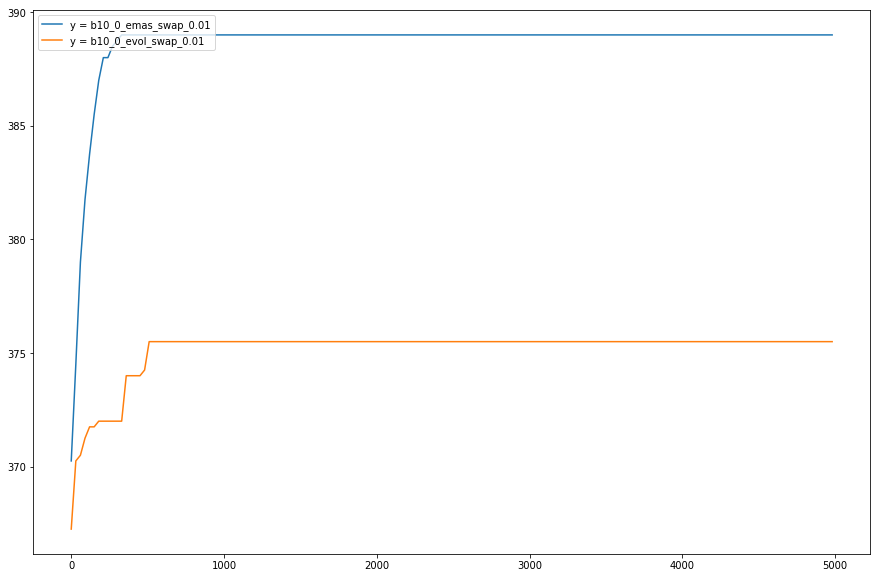

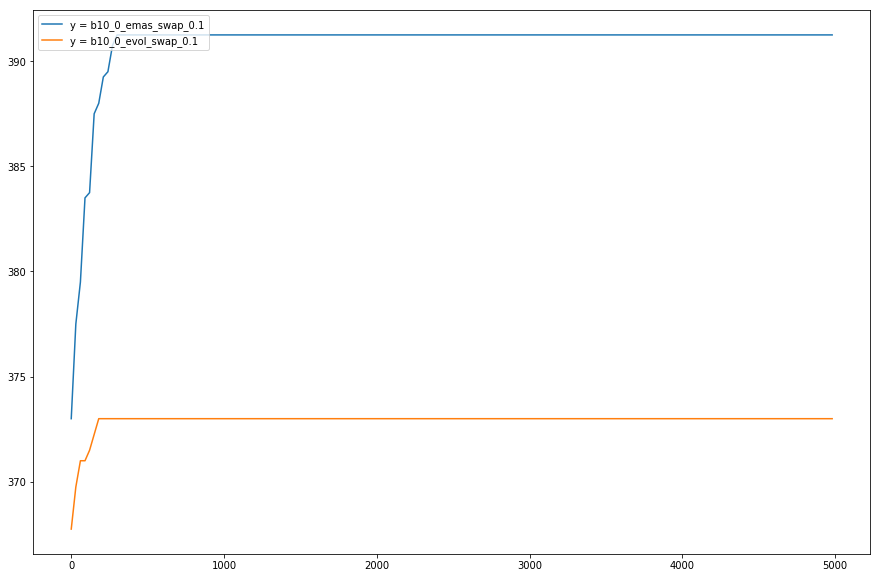

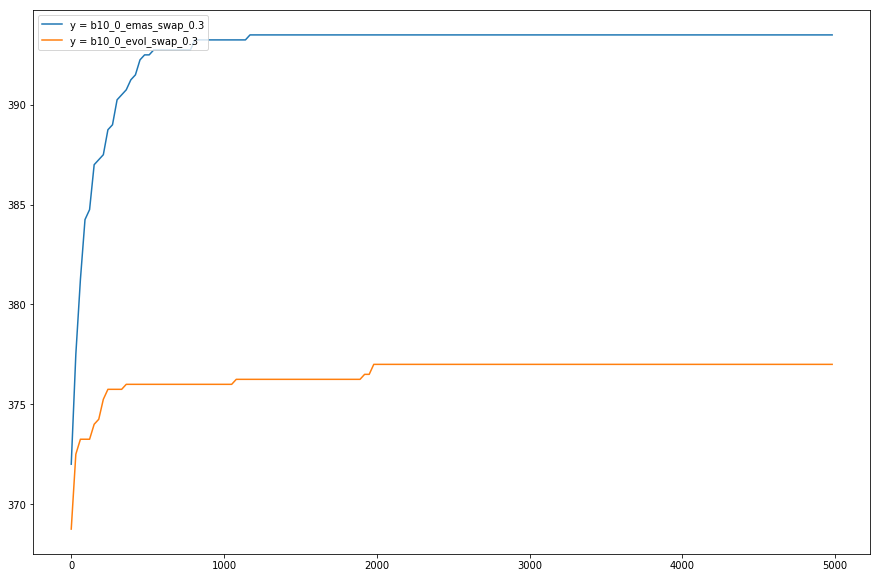

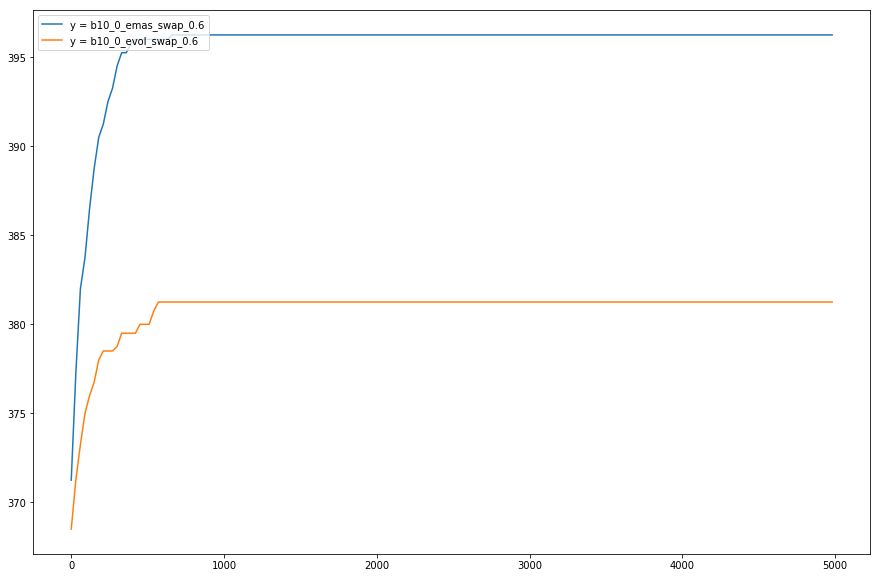

In [16]:
tab_getter = partial(generate_key,fn_suffix=fn_suffix,mutation_strategy="swap")
for probability in mutation_probabilities:
    legend =[]
    emas_title = tab_getter(mode="emas",mutation_prob=probability)
    emas = avg_dict[emas_title]
    
    evol_title = tab_getter(mode="evol",mutation_prob=probability)
    evol = avg_dict[evol_title]
    
    plt.plot(emas["#step"],emas["fitness"])
    legend.append("y = {}".format(label_to_legend(emas_title)))
    plt.plot(evol["#step"],evol["fitness"])
    legend.append("y = {}".format(label_to_legend(evol_title)))

    plt.legend(legend, loc='upper left')
    plt.show()

# 2. Flip vs Swap

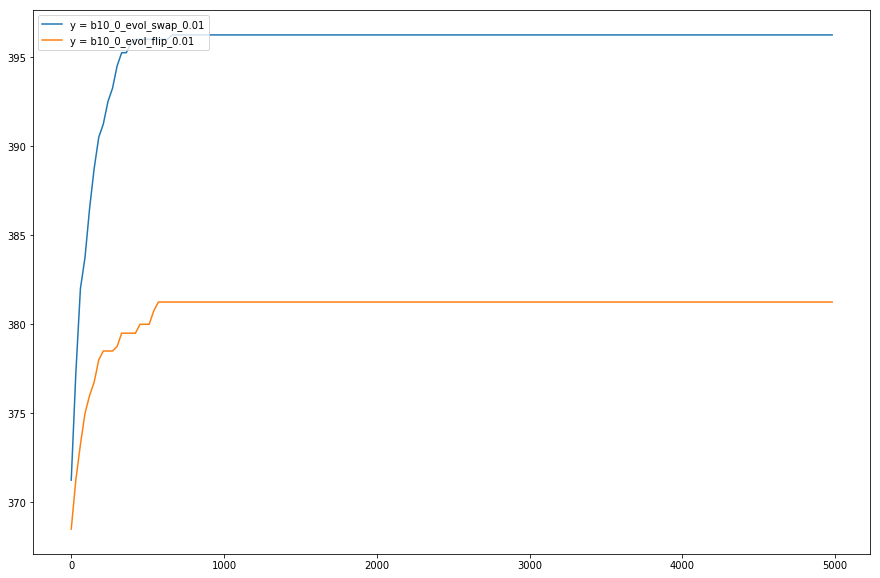

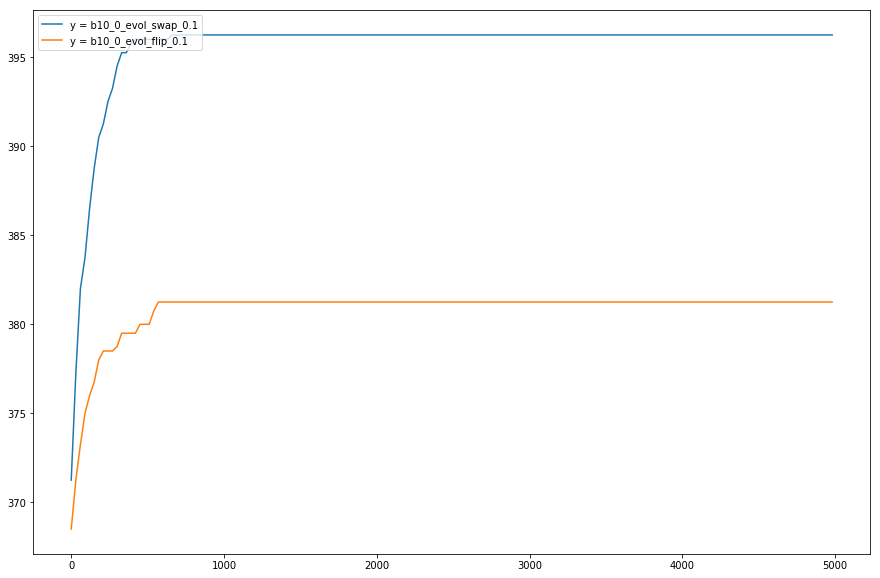

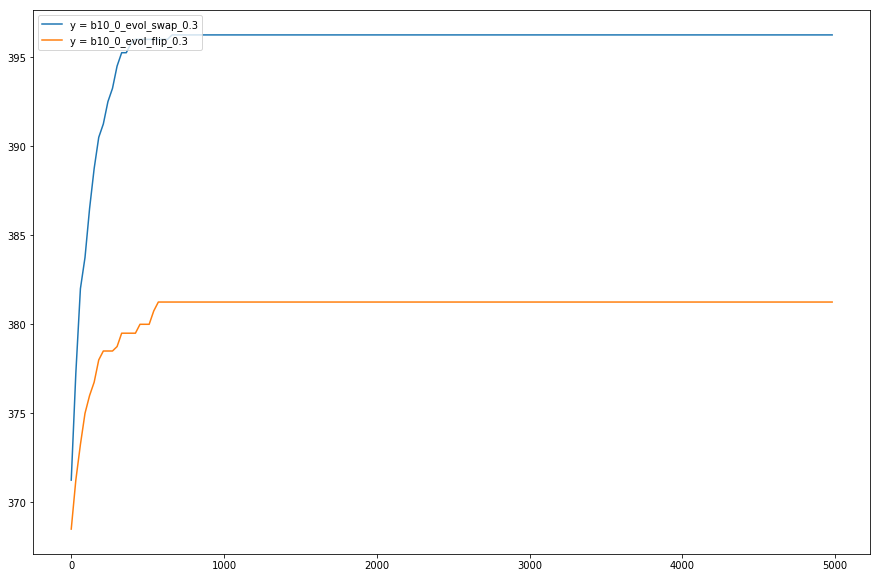

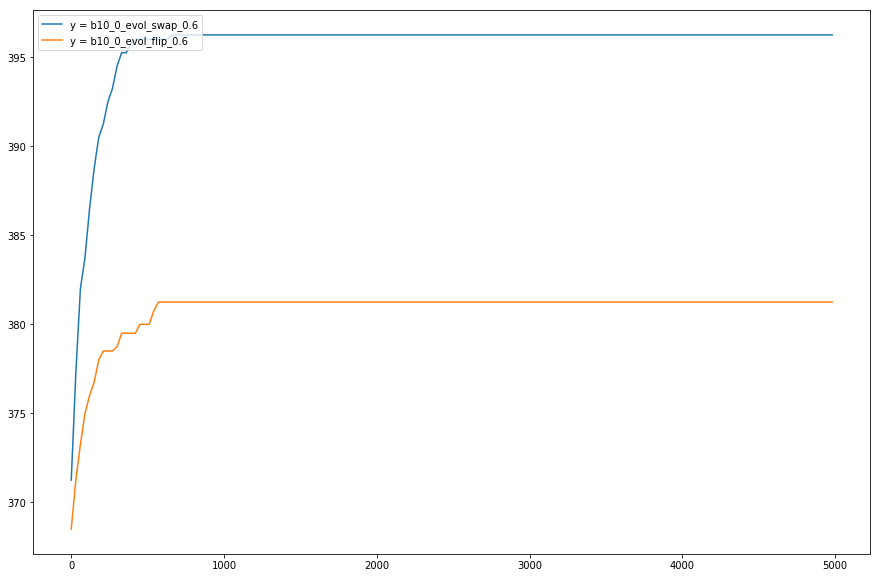

In [19]:
tab_getter = partial(generate_key,fn_suffix=fn_suffix,mode="evol")
for probability in mutation_probabilities:
    legend =[]
    swap_title = tab_getter(mutation_strategy="swap",mutation_prob=probability)
    swap = avg_dict[emas_title]
    
    flip_title = tab_getter(mutation_strategy="flip",mutation_prob=probability)
    flip = avg_dict[evol_title]
    
    plt.plot(swap["#step"],swap["fitness"])
    legend.append("y = {}".format(label_to_legend(swap_title)))
    plt.plot(flip["#step"],flip["fitness"])
    legend.append("y = {}".format(label_to_legend(flip_title)))

    plt.legend(legend, loc='upper left')
    plt.show()
    

# 3. Mutation Probabilites

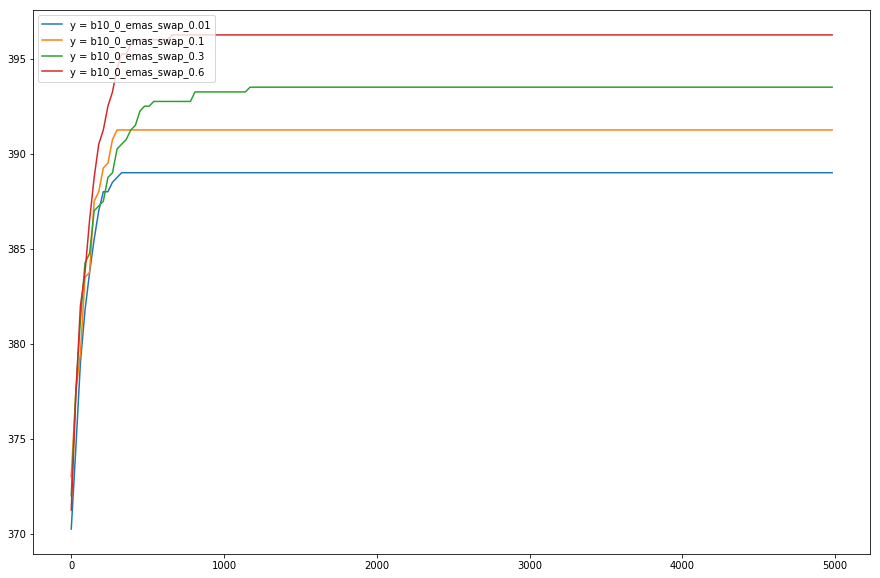

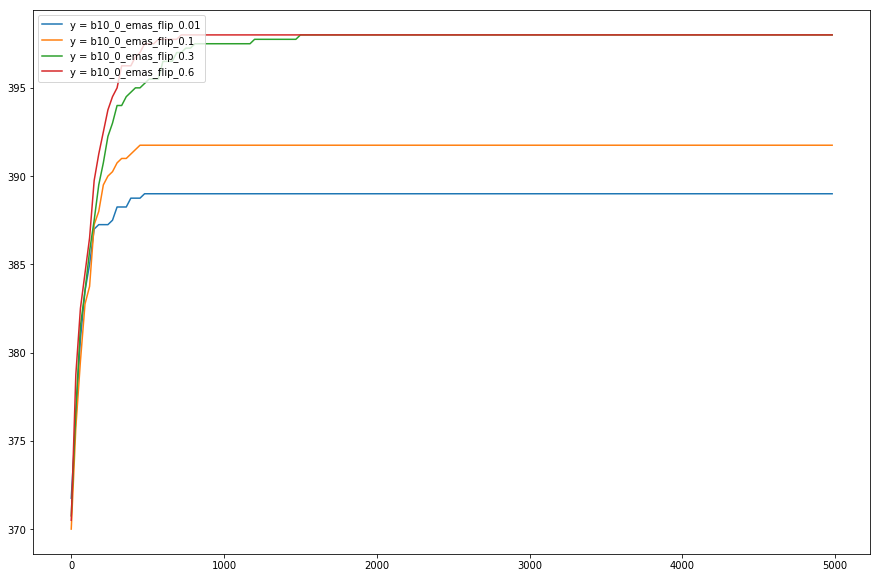

In [24]:
tab_getter = partial(generate_key,fn_suffix=fn_suffix,mode="emas")
for strategy in mutation_strategies:
    legend =[]
    for probability in mutation_probabilities:
        title = tab_getter(mutation_strategy=strategy,mutation_prob=probability)
        
        plt.plot(avg_dict[title]["#step"],avg_dict[title]["fitness"])
        legend.append("y = {}".format(label_to_legend(title)))

    plt.legend(legend, loc='upper left')
    plt.show()